In [2]:
import sys
sys.path.append('../')

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from abelfunctions import RiemannTheta

import layers as layers
import model as mdl

import warnings
warnings.filterwarnings('ignore')

from costfunctions import mse
import minimizer

# Example 1 Sine-Mixture with gaussian noise

In [26]:
M = mdl.Model()
M.add(layers.ThetaUnitLayer(1,3))
M.add(layers.ThetaUnitLayer(3,3))
M.add(layers.ThetaUnitLayer(3,1))

In [27]:
def func(x):
    return 0.5*np.sin(1*x+0.1)+0.75*np.sin(0.25*x-0.3)+0*np.random.normal(0,0.2,x.shape[2])

X = np.linspace(0, 100, 500)
X = X.reshape((1,X.shape[0]))

Y = func(X[:,None]).reshape((1,X.shape[1]))

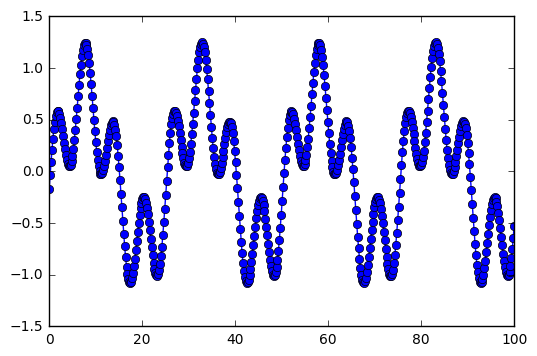

In [28]:
plt.plot(X.flatten(), Y.flatten(),"ob-")

In [ ]:
minim = minimizer.CMA(parallel=True)
minim.train(mse, M, X, Y, tolfun=1e-3)

CMA on 8 cpu(s) enabled
(7_w,14)-aCMA-ES (mu_w=4.3,w_1=36%) in dimension 29 (seed=1081733, Sat Oct 14 11:24:23 2017)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     14 4.251975108648887e-01 1.0e+00 9.36e-01  9e-01  9e-01 0:00.4
    2     28 4.267205896018162e-01 1.1e+00 9.13e-01  9e-01  9e-01 0:00.7
    3     42 4.954999829790278e-01 1.1e+00 9.11e-01  9e-01  9e-01 0:01.0
   12    168 4.148752939306168e-01 1.3e+00 8.41e-01  8e-01  9e-01 0:04.1
   24    336 4.127567398151517e-01 1.6e+00 8.22e-01  7e-01  9e-01 0:08.2
   39    546 4.036555574578145e-01 1.8e+00 6.82e-01  6e-01  8e-01 0:13.3
   57    798 3.823538157781534e-01 2.1e+00 5.64e-01  4e-01  6e-01 0:19.5
   78   1092 4.018994840860830e-01 2.3e+00 5.54e-01  4e-01  6e-01 0:26.6
  100   1400 3.991511567381395e-01 2.4e+00 3.71e-01  3e-01  4e-01 0:34.1
  127   1778 3.898496730579201e-01 2.9e+00 3.26e-01  2e-01  4e-01 0:43.3
  157   2198 3.766461652336915e-01 3.5e+00 3.08e-01  2e-01  4e-01 0:53.5
  190   

In [ ]:
npoints = 500
test_X = (np.linspace(0, 100, npoints)).reshape((1, npoints))

plt.plot(X.flatten(), Y.flatten(),"og-", label='target')
plt.plot(test_X.flatten(), np.real(M.predict(test_X)).flatten(),"ob-", label='fit')
plt.legend()